In [141]:
import pandas as pd

# load imdb csv file into dataframe
imdb = pd.read_csv("./movies_with_SplitGenres.csv" )
imdb.head(2)

,movie_title,title_year,director_name,gross,budget,content_rating,country,duration,actor_1_facebook_likes,genres,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Avatar,2009.0,James Cameron,760505847.0,237000000.0,3,USA,178.0,1000.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: At World's End,2007.0,Gore Verbinski,309404152.0,300000000.0,3,USA,169.0,40000.0,Action|Adventure|Fantasy,...,0,0,0,0,0,0,0,0,0,0


In [142]:
budg = imdb.loc[:,'adj_budget']
gross = imdb.loc[:,'dir_adj_av_gross']
duration = imdb.loc[:,'duration']

budg_norm = (budg-budg.min())/(budg.max()-budg.min())
gross_norm = (gross-gross.min())/(gross.max()-gross.min())
dur_norm = (duration-duration.min())/(duration.max()-duration.min())

imdb['adj_budget']=budg_norm
imdb['dir_adj_av_gross']=gross_norm
imdb['duration']=dur_norm

In [143]:
imdb.head(2)

,movie_title,title_year,director_name,gross,budget,content_rating,country,duration,actor_1_facebook_likes,genres,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Avatar,2009.0,James Cameron,760505847.0,237000000.0,3,USA,0.481229,1000.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: At World's End,2007.0,Gore Verbinski,309404152.0,300000000.0,3,USA,0.450512,40000.0,Action|Adventure|Fantasy,...,0,0,0,0,0,0,0,0,0,0


In [144]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(imdb.ROI_band.unique())

list(le.classes_)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [145]:
#testing a range of classifiers.. 
from sklearn                        import metrics, svm
from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC
from sklearn.ensemble import RandomForestClassifier

In [146]:
#Using content rating & adjusted budget, duration, dir_adj_av_gross and genres to predict gross earnings
X = imdb.loc[:, ['content_rating','adj_budget','duration','dir_adj_av_gross']]
#X = imdb.loc[:, ['content_rating','adj_budget','duration','dir_adj_av_gross','Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime','Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror','Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport','Thriller', 'War', 'Western']]
y = imdb.loc[:, 'ROI_band'].values

#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)


In [147]:
#make predictions
trainingData    = X_train
trainingScores  = y_train 
predictionData  = X_test 
predictionScores = y_test

clf = KNeighborsClassifier(n_neighbors=30, algorithm='auto', metric='minkowski', p=2, weights='uniform')
clf.fit(trainingData, trainingScores)
print("KNeighborsClassifier:", clf.score(predictionData, predictionScores))



KNeighborsClassifier: 0.397959183673


In [148]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sn
import numpy as np

y_predicted = clf.predict(predictionData)
y_predicted.shape

print('predictionScores',  np.unique(predictionScores))
print('y_predicted', np.unique(y_predicted))


predictionScores [ 0  1  2  3  4  5  6  7 10 11]
y_predicted [0 1 3 4 5 6]


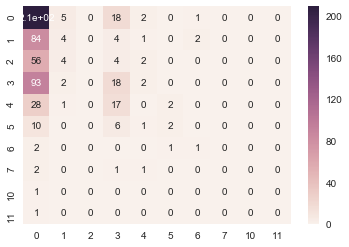

In [149]:
cm_array = confusion_matrix(predictionScores, y_predicted)

df_cm = pd.DataFrame(cm_array, index=[i for i in np.unique(predictionScores)], columns=[i for i in np.unique(predictionScores)])

sn.heatmap(df_cm, annot=True)

In [150]:
cm_array

array([[209,   5,   0,  18,   2,   0,   1,   0,   0,   0],
       [ 84,   4,   0,   4,   1,   0,   2,   0,   0,   0],
       [ 56,   4,   0,   4,   2,   0,   0,   0,   0,   0],
       [ 93,   2,   0,  18,   2,   0,   0,   0,   0,   0],
       [ 28,   1,   0,  17,   0,   2,   0,   0,   0,   0],
       [ 10,   0,   0,   6,   1,   2,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   1,   1,   0,   0,   0],
       [  2,   0,   0,   1,   1,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [151]:
clf =  RandomForestClassifier(n_estimators=40) 
clf.fit(trainingData, trainingScores)
print("RandomForestClassifier:",clf.score(predictionData, predictionScores) )

list(zip(trainingData.columns, clf.feature_importances_))

RandomForestClassifier: 0.501700680272


[('content_rating', 0.059376285309689227),
 ('adj_budget', 0.34731721949222027),
 ('duration', 0.22805321202730872),
 ('dir_adj_av_gross', 0.36525328317078187)]

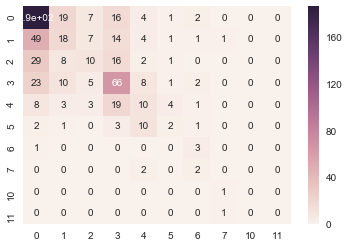

In [152]:
cm_array = confusion_matrix(predictionScores, clf.predict(predictionData))

df_cm = pd.DataFrame(cm_array, index=[i for i in np.unique(predictionScores)], columns=[i for i in np.unique(predictionScores)])

sn.heatmap(df_cm, annot=True)

In [153]:
cm_array

array([[186,  19,   7,  16,   4,   1,   2,   0,   0,   0],
       [ 49,  18,   7,  14,   4,   1,   1,   1,   0,   0],
       [ 29,   8,  10,  16,   2,   1,   0,   0,   0,   0],
       [ 23,  10,   5,  66,   8,   1,   2,   0,   0,   0],
       [  8,   3,   3,  19,  10,   4,   1,   0,   0,   0],
       [  2,   1,   0,   3,  10,   2,   1,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   3,   0,   0,   0],
       [  0,   0,   0,   0,   2,   0,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0]])

In [154]:
clf = LogisticRegression()
clf.fit(trainingData, trainingScores)
print("LogisticRegression:", clf.score(predictionData, predictionScores))


LogisticRegression: 0.40306122449


In [155]:
clf = DecisionTreeClassifier()
clf.fit(trainingData, trainingScores)
print("DecisionTreeClassifier:", clf.score(predictionData, predictionScores))

clf = LinearDiscriminantAnalysis()
clf.fit(trainingData, trainingScores)
print("LinearDiscriminantAnalysis:",  clf.score(predictionData, predictionScores))

clf = GaussianNB()
clf.fit(trainingData, trainingScores)
print("GaussianNB:", clf.score(predictionData, predictionScores))

clf = SVC()
clf.fit(trainingData, trainingScores)
print("SVC:", clf.score(predictionData, predictionScores) )

DecisionTreeClassifier: 0.401360544218
LinearDiscriminantAnalysis: 0.41156462585
GaussianNB: 0.384353741497


/Users/livfranzen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


SVC: 0.399659863946
